In [3]:
from scipy.io import loadmat
import numpy as np
basehock_mat = loadmat('BASEHOCK.mat')
basehock_X = basehock_mat['X']
basehock_y = basehock_mat['Y']
basehock_X = basehock_X.todense()
basehock_y = basehock_y.flatten()
print(basehock_X.shape, basehock_y.shape)
basehock_y[np.where(basehock_y==1)] = 0
basehock_y[np.where(basehock_y==2)] = 1

(1993, 4862) (1993,)


## No feature selection baseline

In [4]:
from Model import make_models
import torch 
from Courier import SyncLocalCourier
from VFLDataUtils import SimpleNumpyDataLoader
from Client import SyncFNNClient
from Strategy import SyncConcatStrategy
from Server import SyncFNNServer
torch.manual_seed(0)
EMB_DIM = 128
baselines_no_fs = {}
for client_num in range(1, 6):
    client_id_list = list(range(client_num))
    courier = SyncLocalCourier(client_id_list)
    loader = SimpleNumpyDataLoader(
        clients_id_list=client_id_list,
        data_source=(basehock_X, basehock_y)
    )
    loader_dict, input_dims = loader.distribute()
    models, top_model = make_models(input_dims)
    # for model in models: print(model)
    # print(top_model)
    clients = []
    for i, id in enumerate(client_id_list):
        client = SyncFNNClient(
            id=id,
            model= models[i],
            courier=courier,
            train_loader=loader_dict[id]['train_loader'],
            test_loader=loader_dict[id]['test_loader'],
            config_dir='simple_config.ini')
        clients.append(client)
    strategy = SyncConcatStrategy(courier=courier, clients=clients)
    server = SyncFNNServer(
        strategy=strategy,
        courier=courier,
        top_model=top_model,
        emb_model=models[-1],
        train_loader=loader_dict['server']['train_loader'],
        test_loader=loader_dict['server']['test_loader'],
        config_dir='simple_config.ini')
    
    print('Training Starts')
    print(f'Number of Clients: {client_num}')
    print('-'*89)
    for epoch in range(100):
        server.fit(epoch)
    history = server.get_history()
    baselines_no_fs[client_num] = history    

Client 0: Feature Index 0-2430
Server : Feature Index 2431-4861
Training Starts
Number of Clients: 1
-----------------------------------------------------------------------------------------
Epoch 000: | Loss: 0.62726 | Acc: 0.631 | Val ACC: 0.930
Epoch 001: | Loss: 0.13662 | Acc: 0.981 | Val ACC: 0.965
Epoch 002: | Loss: 0.00888 | Acc: 0.998 | Val ACC: 0.972
Epoch 003: | Loss: 0.00300 | Acc: 0.999 | Val ACC: 0.965
Epoch 004: | Loss: 0.00585 | Acc: 0.999 | Val ACC: 0.977
Epoch 005: | Loss: 0.00043 | Acc: 1.000 | Val ACC: 0.972
Epoch 006: | Loss: 0.00016 | Acc: 1.000 | Val ACC: 0.977
Epoch 007: | Loss: 0.00030 | Acc: 1.000 | Val ACC: 0.977
Epoch 008: | Loss: 0.00045 | Acc: 1.000 | Val ACC: 0.980
Epoch 009: | Loss: 0.00005 | Acc: 1.000 | Val ACC: 0.980
Epoch 010: | Loss: 0.00005 | Acc: 1.000 | Val ACC: 0.977
Epoch 011: | Loss: 0.00005 | Acc: 1.000 | Val ACC: 0.977
Epoch 012: | Loss: 0.00004 | Acc: 1.000 | Val ACC: 0.977
Epoch 013: | Loss: 0.00004 | Acc: 1.000 | Val ACC: 0.977
Epoch 014: 

---

# STG on Feature

In [4]:
## STG on Features
from Model import make_stg_models
from Strategy import SyncSTGConcatStrategy
from Server import SyncSTGServer
import torch
torch.manual_seed(0)
EMB_DIM = 128
baselines_stg = {}
for client_num in range(1, 6):
    client_id_list = list(range(client_num))
    courier = SyncLocalCourier(client_id_list)
    loader = SimpleNumpyDataLoader(
        clients_id_list=client_id_list,
        data_source=(basehock_X, basehock_y)
    )
    loader_dict, input_dims = loader.distribute()
    models, top_model = make_stg_models(input_dims)
    # for model in models: print(model)
    # print(top_model)
    clients = []
    for i, id in enumerate(client_id_list):
        client = SyncFNNClient(
            id=id,
            model= models[i],
            courier=courier,
            train_loader=loader_dict[id]['train_loader'],
            test_loader=loader_dict[id]['test_loader'],
            config_dir='simple_config.ini')
        clients.append(client)
    strategy = SyncSTGConcatStrategy(courier=courier, clients=clients)
    server = SyncSTGServer(
        strategy=strategy,
        courier=courier,
        top_model=top_model,
        emb_model=models[-1],
        train_loader=loader_dict['server']['train_loader'],
        test_loader=loader_dict['server']['test_loader'],
        config_dir='simple_config.ini')
    
    print('Training Starts')
    print(f'Number of Clients: {client_num}')
    print('-'*89)
    for epoch in range(100):
        server.fit(epoch)
        # count number of parameters      
    history = server.get_history()
    baselines_stg[client_num] = history  

Client 0: Feature Index 0-2430
Server : Feature Index 2431-4861
Training Starts
Number of Clients: 1
-----------------------------------------------------------------------------------------
Epoch 000: | Loss: 0.43087 | Acc: 0.784 | Val ACC: 0.947 | Features Left: 1411
Epoch 001: | Loss: 0.06318 | Acc: 0.981 | Val ACC: 0.965 | Features Left: 1585
Epoch 002: | Loss: 0.03729 | Acc: 0.992 | Val ACC: 0.932 | Features Left: 1614
Epoch 003: | Loss: 0.01573 | Acc: 0.997 | Val ACC: 0.952 | Features Left: 1621
Epoch 004: | Loss: 0.00066 | Acc: 1.000 | Val ACC: 0.952 | Features Left: 1616
Epoch 005: | Loss: 0.00006 | Acc: 1.000 | Val ACC: 0.955 | Features Left: 1599
Epoch 006: | Loss: 0.00002 | Acc: 1.000 | Val ACC: 0.952 | Features Left: 1578
Epoch 007: | Loss: 0.00001 | Acc: 1.000 | Val ACC: 0.955 | Features Left: 1560
Epoch 008: | Loss: 0.00001 | Acc: 1.000 | Val ACC: 0.950 | Features Left: 1549
Epoch 009: | Loss: 0.00001 | Acc: 1.000 | Val ACC: 0.950 | Features Left: 1534
Epoch 010: | Loss: 

---
# Dual STG

There two important hyperparameters:
* $\lambda_{top}$ which controls how much the dual STG model punishes the embedding size
* $\sigma_{top}$ cnntrols the randomness
* We may also need to introduce additional hyperparameters that controls when to start training the embedding layer STG based on the performance
Let's begin with the most naive experiments


In [24]:
from Model import STGEmbModel
from stg.models import FeatureSelector
class DualSTGModel(STGEmbModel):
    def __init__(self, top_lam=0.1, top_sigma=1.0, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.top_lam = top_lam
        self.top_fs = FeatureSelector(self.output_dim, 
            sigma=top_sigma, device=torch.device('cuda'))
        self.top_reg = self.top_fs.regularizer
        self.top_sigma = self.top_fs.sigma
        self.top_mu = self.top_fs.mu


    def forward(self, x):
        x = self.fs(x)
        emb = self.mlp(x)
        reduced_emb = self.top_fs(emb)
        return reduced_emb

    def get_top_reg_loss(self):
        # reg = torch.mean(self.reg((self.mu + 0.5)/self.sigma))
        top_reg = torch.mean(self.top_reg((self.top_fs.mu + 0.5)/self.top_sigma))
        return top_reg * self.top_lam
    
    def get_emb_gates(self):
        top_mu = self.top_fs.mu.detach().cpu().numpy()
        top_z = np.maximum(np.minimum(top_mu, 1), 0)
        return top_z, np.count_nonzero(top_z)



In [25]:
from torch import nn
def make_dual_stg_models(input_dims, emb_dim=128, output_dim=1, top_lambda=0.1):
    models = []
    for input_dim in input_dims:
        model = []
        if input_dim >= 512:
            model = DualSTGModel(input_dim=input_dim, output_dim=emb_dim, 
            hidden_dims=[512, 256], top_lam=top_lambda
            )
        else:
            model = DualSTGModel(input_dim=input_dim, output_dim=emb_dim, 
            hidden_dims=[256], top_lam=top_lambda)
        models.append(model)
    top_model = nn.Sequential(
        nn.Linear(len(input_dims)*128, 32), nn.ReLU(True), nn.Linear(32, output_dim), nn.Sigmoid()
    )
    return models, top_model


In [26]:
from Strategy import SyncSTGConcatStrategy
class SyncDualSTGConcatStrategy(SyncSTGConcatStrategy):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        
    def number_of_embs(self):
        num_embs = 0
        for client in self.clients:
            _, num = client.model.get_emb_gates()
            num_embs += num
        return num_embs

    def update_all(self, loss, server_reg_loss):
        reg_loss = server_reg_loss
        # print(reg_loss)
        for client in self.clients:
            reg_loss += client.model.get_reg_loss()
            reg_loss += client.model.get_top_reg_loss()
        reg_loss = reg_loss/(len(self.clients)+1)
        total_loss = reg_loss + loss
        # print(total_loss)
        total_loss.backward()
        map(lambda client: client.update(), self.clients)
        return total_loss.item(), reg_loss.item()
       

    def get_all_gates(self):
        top_gates = []
        btm_gates = []
        for client in self.clients:
            btm_gate, _ = client.model.get_gates()
            top_gate, _ = client.model.get_emb_gates()
            top_gates.append(top_gate)
            btm_gates.append(btm_gate)
        return top_gates, btm_gates

In [27]:
from Server import SyncSTGServer
class SyncDualSTGServer(SyncSTGServer):
    def __init__(self, record_at=20, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.gates = []
        self.record_at = record_at

    def fit(self, e):
        train_acc = 0
        train_loss = 0
        for x, y in self.train_loader:
            x = x.float().to(self.device)
            y = y.float().to(self.device).view(-1, 1)
            self.optimizer.zero_grad()
            server_emb = self.emb_model(x)
            clients_emb = self.strategy.aggregate()
            emb = torch.cat([server_emb, clients_emb], 1)
            server_reg_loss = self.emb_model.get_reg_loss()
            server_reg_loss += self.emb_model.get_top_reg_loss()
            out = self.model(emb)
            loss = self.criterion(out, y)
            acc = self.binary_acc(out.detach().cpu(), y.detach().cpu())
            total_loss, reg_loss = self.strategy.update_all(loss, server_reg_loss)
            self.optimizer.step()
            train_loss += loss.item()
            train_acc += acc
        test_acc = self.evaluate()
        _, num_feats = self.emb_model.get_gates()
        num_feats += self.strategy.number_of_features()
        num_embs = self.strategy.number_of_embs()
        
        print(f'Epoch {e+0:03}: |  Loss: {train_loss/len(self.train_loader):.5f} | Acc: {train_acc/len(self.train_loader):.3f} | Val ACC: {test_acc/len(self.test_loader):.3f} | Features Left: {num_feats} | Embeddings Left: {num_embs}')
        print(f'Total loss {total_loss:.5f} | Reg loss {reg_loss:.5f}')
        
        self.train_acc.append(train_acc/len(self.train_loader))
        self.test_acc.append(test_acc/len(self.test_loader))
        if e % self.record_at == 0:
            gates = self.strategy.get_all_gates()
            self.gates.append(gates)

In [216]:
model = DualSTGModel(input_dim=512, output_dim=128, hidden_dims=[512, 256], lam=0.1)
model.train()
x1 = torch.ones(100, 256)
x2 = torch.zeros(100, 256)
x = torch.cat([x1, x2], dim=1)
x = x.requires_grad_()
print(x.shape)
y = torch.zeros(100, 128, requires_grad=True)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-3)
criterion = nn.MSELoss()

torch.Size([100, 512])


<AxesSubplot:>

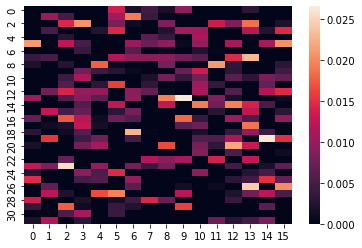

In [217]:
import seaborn as sns
z, num_feats =  model.get_gates()
sns.heatmap(z.reshape(32, 16), vmin=0)

<AxesSubplot:>

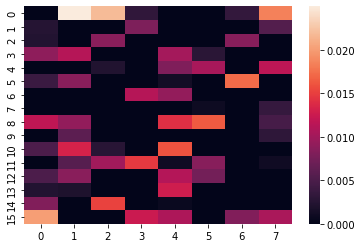

In [218]:
top_z, num_embs = model.get_emb_gates()
sns.heatmap(top_z.reshape(16, 8), vmin=0)

In [219]:
for epoch in range(15):
    optimizer.zero_grad()
    out = model(x)
    loss = criterion(y, out)
    reg = model.get_reg_loss()
    top_reg = model.get_top_reg_loss()
    total_loss = loss + reg + top_reg
    total_loss.backward()
    print(loss.item(), reg.item(), top_reg.item(), total_loss.item())
    optimizer.step()

0.001814908697269857 0.06914692372083664 0.06913380324840546 0.14009563624858856
0.0005737748579122126 0.06911212205886841 0.0690985769033432 0.1387844681739807
0.0005636379937641323 0.06907729059457779 0.06906343251466751 0.1387043595314026
0.0007177602383308113 0.0690423995256424 0.06902828812599182 0.13878844678401947
0.0003050370141863823 0.069007508456707 0.06899314373731613 0.1383056938648224
0.0004175739595666528 0.06897260993719101 0.06895800679922104 0.13834819197654724
0.0003164559311699122 0.06893772631883621 0.06892286986112595 0.1381770521402359
0.0002885769063141197 0.0689028725028038 0.06888773292303085 0.1380791813135147
0.000151358763105236 0.06886806339025497 0.06885260343551636 0.13787202537059784
0.00016343822062481195 0.06883331388235092 0.06881747394800186 0.1378142237663269
0.00014520403055939823 0.06879863142967224 0.06878235191106796 0.13772618770599365
0.00014972305507399142 0.06876403838396072 0.06874724477529526 0.13766101002693176
8.202371100196615e-05 0.06

<AxesSubplot:>

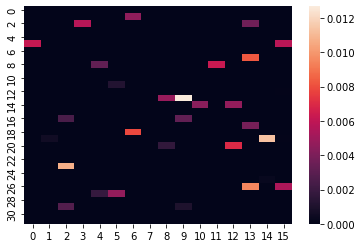

In [220]:
z, num_feats =  model.get_gates()
sns.heatmap(z.reshape(32, 16), vmin=0)

<AxesSubplot:>

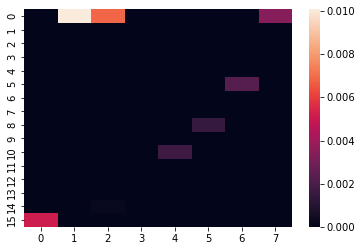

In [221]:
top_z, num_embs = model.get_emb_gates()
sns.heatmap(top_z.reshape(16, 8), vmin=0)

In [223]:
import torchviz 
torchviz.make_dot(total_loss, params=dict(model.named_parameters()))

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [34]:
import torch
from Courier import SyncLocalCourier
from VFLDataUtils import SimpleNumpyDataLoader
from Client import SyncFNNClient
torch.manual_seed(0)
EMB_DIM = 128
baselines_dualstg = {}
for client_num in range(1, 6):
    client_id_list = list(range(client_num))
    courier = SyncLocalCourier(client_id_list)
    loader = SimpleNumpyDataLoader(
        clients_id_list=client_id_list,
        data_source=(basehock_X, basehock_y)
    )
    loader_dict, input_dims = loader.distribute()
    models, top_model = make_dual_stg_models(input_dims)
    # for model in models: print(model)
    # print(top_model)
    clients = []
    for i, id in enumerate(client_id_list):
        client = SyncFNNClient(
            id=id,
            model= models[i],
            courier=courier,
            train_loader=loader_dict[id]['train_loader'],
            test_loader=loader_dict[id]['test_loader'],
            config_dir='simple_config.ini')
        clients.append(client)
    strategy = SyncDualSTGConcatStrategy(courier=courier, clients=clients)
    server = SyncDualSTGServer(
        strategy=strategy,
        courier=courier,
        top_model=top_model,
        emb_model=models[-1],
        train_loader=loader_dict['server']['train_loader'],
        test_loader=loader_dict['server']['test_loader'],
        config_dir='simple_config.ini')
    
    print('Training Starts')
    print(f'Number of Clients: {client_num}')
    print('-'*89)
    for epoch in range(100):
        server.fit(epoch)  
    history = server.get_history()
    baselines_dualstg[client_num] = history  

Client 0: Feature Index 0-2430
Server : Feature Index 2431-4861
Training Starts
Number of Clients: 1
-----------------------------------------------------------------------------------------
Epoch 000: |  Loss: 0.67675 | Acc: 0.635 | Val ACC: 0.902 | Features Left: 1543 | Embeddings Left: 69
Total loss 0.75904 | Reg loss 0.13797
Epoch 001: |  Loss: 0.35869 | Acc: 0.969 | Val ACC: 0.957 | Features Left: 1684 | Embeddings Left: 69
Total loss 0.22392 | Reg loss 0.13811
Epoch 002: |  Loss: 0.03464 | Acc: 0.989 | Val ACC: 0.952 | Features Left: 1820 | Embeddings Left: 69
Total loss 0.13855 | Reg loss 0.13828
Epoch 003: |  Loss: 0.00915 | Acc: 0.998 | Val ACC: 0.965 | Features Left: 1825 | Embeddings Left: 69
Total loss 0.13855 | Reg loss 0.13828
Epoch 004: |  Loss: 0.00157 | Acc: 0.999 | Val ACC: 0.957 | Features Left: 1802 | Embeddings Left: 69
Total loss 0.13823 | Reg loss 0.13821
Epoch 005: |  Loss: 0.00042 | Acc: 1.000 | Val ACC: 0.960 | Features Left: 1758 | Embeddings Left: 69
Total l

__Number of Embeddings Never chages? That's pretty weired.__

Go back to two-party setting to investigate what's goring wrong

In [52]:
client_num = 1
client_id_list = list(range(client_num))
courier = SyncLocalCourier(client_id_list)
loader = SimpleNumpyDataLoader(
        clients_id_list=client_id_list,
        data_source=(basehock_X, basehock_y)
    )
loader_dict, input_dims = loader.distribute()
models, top_model = make_dual_stg_models(input_dims, top_lambda=0.5)
clients = []
for i, id in enumerate(client_id_list):
    client = SyncFNNClient(
        id=id,
        model=models[i],
        courier=courier,
        train_loader=loader_dict[id]['train_loader'],
        test_loader=loader_dict[id]['test_loader'],
        config_dir='simple_config.ini')
    clients.append(client)
strategy = SyncDualSTGConcatStrategy(courier=courier, clients=clients)
server = SyncDualSTGServer(
        strategy=strategy,
        courier=courier,
        top_model=top_model,
        emb_model=models[-1],
        train_loader=loader_dict['server']['train_loader'],
        test_loader=loader_dict['server']['test_loader'],
        config_dir='simple_config.ini')

Client 0: Feature Index 0-2430
Server : Feature Index 2431-4861


In [53]:
clients[0].model.top_mu

Parameter containing:
tensor([-0.0109,  0.0007, -0.0126, -0.0075, -0.0115, -0.0081,  0.0063, -0.0012,
         0.0062, -0.0042,  0.0113,  0.0065,  0.0140,  0.0137,  0.0094, -0.0143,
         0.0043,  0.0052,  0.0018, -0.0017,  0.0089, -0.0033, -0.0054,  0.0219,
         0.0071,  0.0048, -0.0002,  0.0183,  0.0085, -0.0028, -0.0008, -0.0025,
         0.0006, -0.0105,  0.0007, -0.0018, -0.0145,  0.0031, -0.0157,  0.0212,
         0.0130, -0.0010, -0.0075, -0.0044,  0.0082, -0.0041, -0.0035,  0.0077,
        -0.0066, -0.0039, -0.0112, -0.0050,  0.0011,  0.0059,  0.0056,  0.0075,
         0.0059,  0.0147, -0.0018, -0.0040, -0.0138,  0.0113, -0.0049,  0.0052,
         0.0014, -0.0030,  0.0100, -0.0076, -0.0165, -0.0080, -0.0060,  0.0151,
         0.0078,  0.0047,  0.0022,  0.0139,  0.0206,  0.0037,  0.0055,  0.0130,
         0.0018, -0.0065,  0.0221,  0.0041, -0.0016,  0.0178,  0.0134, -0.0063,
         0.0132,  0.0019,  0.0046, -0.0055,  0.0151,  0.0063, -0.0124, -0.0056,
         0.0123,  

In [54]:
clients[0].model.top_mu.grad

In [55]:
_, num_embs = clients[0].model.get_emb_gates()
num_embs

74

In [56]:
clients[0].model(torch.randn(100, 2431).cuda())

tensor([[-0.0516,  0.0087,  0.0462,  ...,  0.0474,  0.0000,  0.0869],
        [-0.0192,  0.0493,  0.1121,  ..., -0.0560,  0.0000,  0.0630],
        [ 0.0733,  0.0464,  0.1081,  ..., -0.0206,  0.0000,  0.1329],
        ...,
        [ 0.0272,  0.0411,  0.0009,  ..., -0.0218,  0.0000,  0.1326],
        [ 0.0361,  0.0213,  0.0559,  ...,  0.0032,  0.0000,  0.0604],
        [ 0.0557,  0.0433,  0.0070,  ..., -0.0170,  0.0000,  0.0951]],
       device='cuda:0', grad_fn=<MulBackward0>)

In [57]:
loss = clients[0].model.get_reg_loss() 
loss

tensor(0.0691, device='cuda:0', grad_fn=<MulBackward0>)

In [58]:
loss.backward()

In [59]:
clients[0].model.top_mu.grad

In [60]:
clients[0].optimizer.step()
_, num_embs = clients[0].model.get_emb_gates()
num_embs

74

In [143]:
for epoch in range(100):
    server.fit(epoch)
    # print('Client', clients[0].model.top_mu.grad)
    _, num_embs = clients[0].model.get_emb_gates()
    _, num_feats = clients[0].model.get_gates()
    print(num_embs, num_feats)
    # print('Sever', server.emb_model.top_mu.grad)

Epoch 000: |  Loss: 0.00004 | Acc: 1.000 | Val ACC: 0.962 | Features Left: 113 | Embeddings Left: 0
Total loss 0.12736 | Reg loss 0.12735
0 0
Epoch 001: |  Loss: 0.00004 | Acc: 1.000 | Val ACC: 0.962 | Features Left: 112 | Embeddings Left: 0
Total loss 0.12710 | Reg loss 0.12709
0 0
Epoch 002: |  Loss: 0.00004 | Acc: 1.000 | Val ACC: 0.962 | Features Left: 111 | Embeddings Left: 0
Total loss 0.12685 | Reg loss 0.12684
0 0
Epoch 003: |  Loss: 0.00004 | Acc: 1.000 | Val ACC: 0.962 | Features Left: 111 | Embeddings Left: 0
Total loss 0.12659 | Reg loss 0.12658
0 0
Epoch 004: |  Loss: 0.00004 | Acc: 1.000 | Val ACC: 0.962 | Features Left: 107 | Embeddings Left: 0
Total loss 0.12633 | Reg loss 0.12632
0 0
Epoch 005: |  Loss: 0.00004 | Acc: 1.000 | Val ACC: 0.962 | Features Left: 104 | Embeddings Left: 0
Total loss 0.12607 | Reg loss 0.12606
0 0
Epoch 006: |  Loss: 0.00004 | Acc: 1.000 | Val ACC: 0.962 | Features Left: 100 | Embeddings Left: 0
Total loss 0.12581 | Reg loss 0.12580
0 0
Epoch 

In [144]:
len(server.gates)

8

<AxesSubplot:>

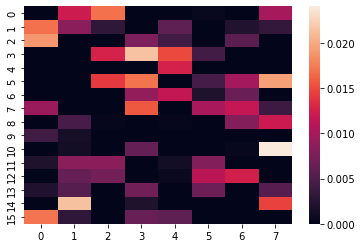

In [145]:
top_gates, btm_gates = server.gates[0]
top_gate = top_gates[0]
sns.heatmap(top_gate.reshape(16, 8), vmin=0)

<AxesSubplot:>

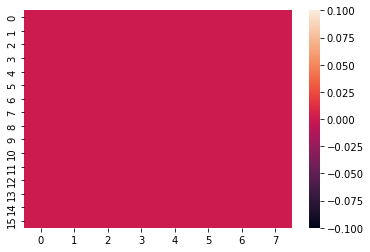

In [146]:
top_gates, btm_gates = server.gates[-1]
top_gate = top_gates[0]
sns.heatmap(top_gate.reshape(16, 8), vmin=0)

In [192]:
class SyncDualSTGClient(SyncFNNClient):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        self.optimizer = torch.optim.SGD([
                {'params': model.fs.parameters(), 'lr': 1e-3},
                {'params': model.top_fs.parameters(), 'lr': 1e-3},
            ])

In [206]:
client_num = 1
client_id_list = list(range(client_num))
courier = SyncLocalCourier(client_id_list)
loader = SimpleNumpyDataLoader(
        clients_id_list=client_id_list,
        data_source=(basehock_X, basehock_y)
    )
loader_dict, input_dims = loader.distribute()
models, top_model = make_dual_stg_models(input_dims, top_lambda=100)
clients = []
for i, id in enumerate(client_id_list):
    client = SyncDualSTGClient(
        id=id,
        model=models[i],
        courier=courier,
        train_loader=loader_dict[id]['train_loader'],
        test_loader=loader_dict[id]['test_loader'],
        config_dir='simple_config.ini')
    clients.append(client)
strategy = SyncDualSTGConcatStrategy(courier=courier, clients=clients)
server = SyncDualSTGServer(
        strategy=strategy,
        courier=courier,
        top_model=top_model,
        emb_model=models[-1],
        train_loader=loader_dict['server']['train_loader'],
        test_loader=loader_dict['server']['test_loader'],
        config_dir='simple_config.ini')

Client 0: Feature Index 0-2430
Server : Feature Index 2431-4861


In [207]:
clients[0].model

DualSTGModel(
  (mlp): MLPLayer(
    (mlp): Sequential(
      (0): LinearLayer(
        (0): Linear(in_features=2431, out_features=512, bias=True)
        (1): ReLU(inplace=True)
      )
      (1): LinearLayer(
        (0): Linear(in_features=512, out_features=256, bias=True)
        (1): ReLU(inplace=True)
      )
      (2): Linear(in_features=256, out_features=128, bias=True)
    )
  )
  (fs): FeatureSelector()
  (top_fs): FeatureSelector()
)

In [226]:
new_optimizer = torch.optim.Adam(list(clients[0].model.top_fs.parameters()) + 
list(clients[0].model.fs.parameters()), lr=1e-3)
for epoch in range(15):
    server.fit(epoch)
    print('Client', clients[0].model.top_mu)
    print('Client', clients[0].model.mu)
    if epoch > 80:
        new_optimizer.step()
    # print('Sever', server.emb_model.top_mu.grad)

Epoch 000: |  Loss: 0.00019 | Acc: 1.000 | Val ACC: 0.952 | Features Left: 267 | Embeddings Left: 3
Total loss 43.83442 | Reg loss 43.83435
Client Parameter containing:
tensor([-2.0625e-02, -2.4356e-03, -3.5375e-02, -2.7794e-02, -1.4490e-02,
        -1.5558e-02, -1.5959e-02, -2.3139e-02, -2.5749e-02,  7.5490e-04,
        -2.7766e-02, -2.5354e-02, -1.9160e-02, -3.3089e-02, -1.3248e-02,
        -1.1428e-02, -2.7769e-02, -1.4361e-02,  9.3146e-03, -1.9690e-02,
        -5.7924e-03, -1.6099e-02, -8.7701e-03, -2.9552e-02, -1.5436e-02,
        -1.7982e-02, -2.2693e-02, -2.3228e-02, -3.2061e-02, -2.0025e-02,
        -1.1104e-02, -2.9806e-02, -2.1174e-02, -2.3379e-02, -3.7930e-02,
        -2.4234e-02, -8.7241e-03, -2.4329e-02, -8.8785e-03, -3.8360e-02,
        -2.1154e-02, -1.7360e-02, -2.8186e-02, -1.8846e-02, -1.8851e-02,
        -1.9879e-02, -2.9825e-02, -2.2145e-02, -1.5811e-02, -1.1532e-02,
        -1.2267e-02, -3.0718e-02, -2.7948e-02, -1.8112e-02, -2.4702e-02,
        -1.9687e-02, -1.9627

<AxesSubplot:>

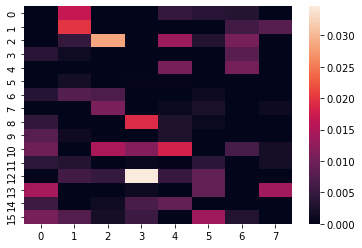

In [209]:
top_gates, btm_gates = server.gates[0]
top_gate = top_gates[0]
sns.heatmap(top_gate.reshape(16, 8), vmin=0)

<AxesSubplot:>

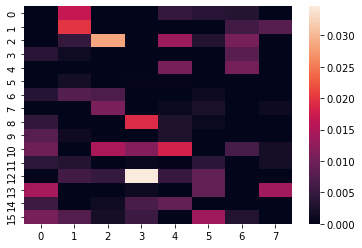

In [210]:
top_gates, btm_gates = server.gates[-1]
top_gate = top_gates[0]
sns.heatmap(top_gate.reshape(16, 8), vmin=0)

<AxesSubplot:>

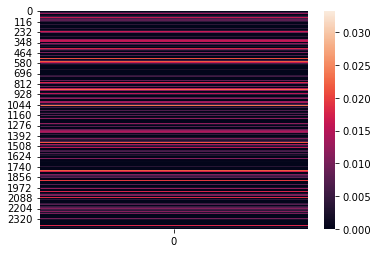

In [211]:
_, btm_gates = server.gates[0]
btm_gate = btm_gates[0]
sns.heatmap(btm_gate.reshape(2431, 1), vmin=0)

<AxesSubplot:>

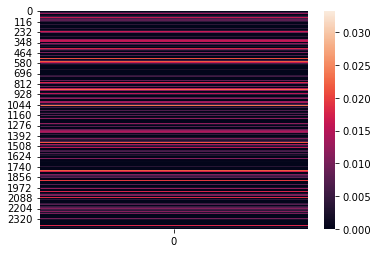

In [212]:
_, btm_gates = server.gates[-1]
btm_gate = btm_gates[0]
sns.heatmap(btm_gate.reshape(2431, 1), vmin=0)

In [213]:
server.emb_model.get_emb_gates()

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 0)

In [ ]:
basehock_y

In [214]:
server.emb_model.get_gates()

(array([0., 0., 0., ..., 0., 0., 0.], dtype=float32), 250)

In [155]:
clients[0].optimizer

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0

Parameter Group 1
    dampening: 0
    lr: 1
    momentum: 0
    nesterov: False
    weight_decay: 0
)